✅ 解压完成


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 87ms/step - accuracy: 0.3290 - loss: 1.8136 - val_accuracy: 0.5059 - val_loss: 1.3603
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.5524 - loss: 1.2528 - val_accuracy: 0.5862 - val_loss: 1.1691
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.6163 - loss: 1.0837 - val_accuracy: 0.6545 - val_loss: 1.0003
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 89ms/step - accuracy: 0.6644 - loss: 0.9610 - val_accuracy: 0.6615 - val_loss: 0.9568
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.6913 - loss: 0.8825 - val_accuracy: 0.6829 - val_loss: 0.9085
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.7099 - loss: 0.8325 - val_accuracy: 0.6710 - val_loss: 0.9535
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.7227 - loss: 0.7888 - val_accuracy: 0.7030 - val_loss: 0.8779
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.7451 - loss: 0.7316 - 

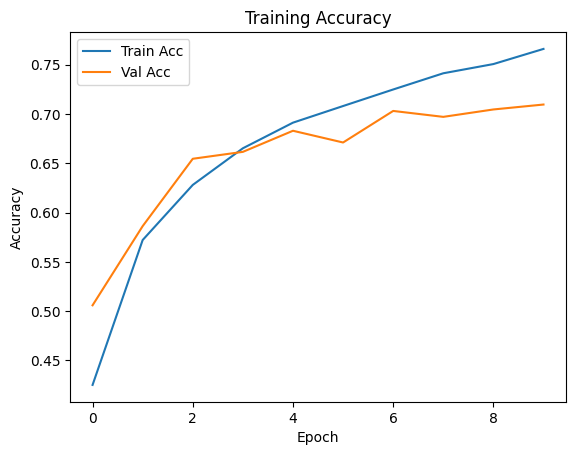

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
import tarfile

# 创建模型输出文件夹
os.makedirs("models", exist_ok=True)

# 解压 CIFAR-10 数据集（只执行一次）
tar_path = "/content/drive/MyDrive/cifar-10-python.tar.gz"
extract_to = "/content/cifar10"

if not os.path.exists(extract_to):
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(path=extract_to)
    print("✅ 解压完成")

# 加载本地数据
def load_cifar_batch(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
        images = data[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        labels = data[b'labels']
        return images / 255.0, np.array(labels)

def load_cifar10_dataset(data_dir):
    x_train, y_train = [], []
    for i in range(1, 6):
        images, labels = load_cifar_batch(f"{data_dir}/data_batch_{i}")
        x_train.append(images)
        y_train.append(labels)
    x_train = np.concatenate(x_train)
    y_train = np.concatenate(y_train)
    x_test, y_test = load_cifar_batch(f"{data_dir}/test_batch")
    return x_train, y_train, x_test, y_test

data_dir = "/content/cifar10/cifar-10-batches-py"
x_train, y_train, x_test, y_test = load_cifar10_dataset(data_dir)

# 建立 CNN 模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# 保存模型
model.save("models/cifar10_cnn_model.h5")

# 绘制训练过程图表
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.savefig('models/training_accuracy.png')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


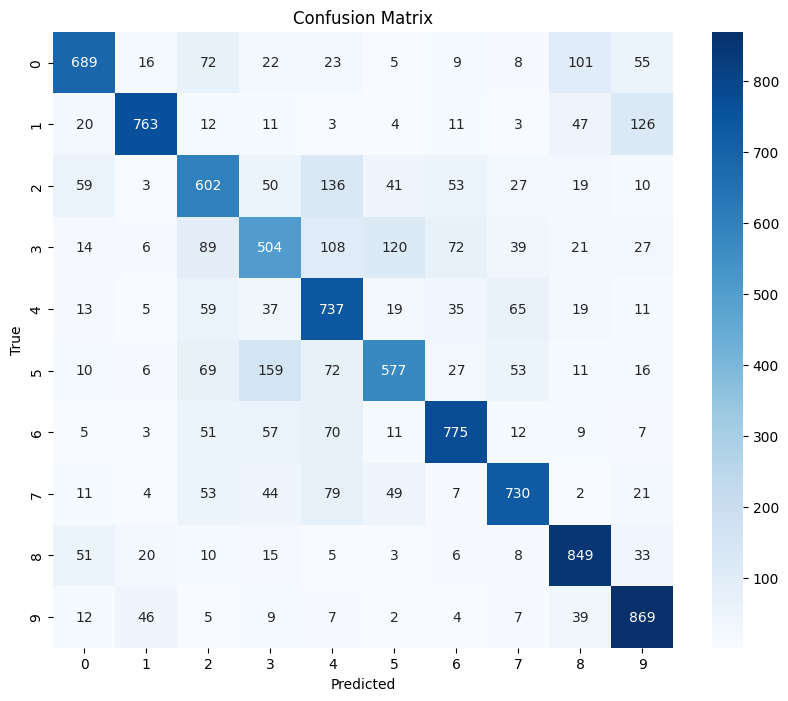

              precision    recall  f1-score   support

    airplane       0.78      0.69      0.73      1000
  automobile       0.88      0.76      0.82      1000
        bird       0.59      0.60      0.60      1000
         cat       0.56      0.50      0.53      1000
        deer       0.59      0.74      0.66      1000
         dog       0.69      0.58      0.63      1000
        frog       0.78      0.78      0.78      1000
       horse       0.77      0.73      0.75      1000
        ship       0.76      0.85      0.80      1000
       truck       0.74      0.87      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# 重新预测测试集
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# 混淆矩阵
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 分类报告
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']
print(classification_report(y_true, y_pred_classes, target_names=target_names))


In [25]:
def make_gradcam_heatmap(img_array, model, pred_index=None):
    conv_outputs, predictions = model(img_array)
    if pred_index is None:
        pred_index = tf.argmax(predictions[0])
    class_channel = predictions[:, pred_index]

    with tf.GradientTape() as tape:
        conv_outputs, predictions = model(img_array)
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [26]:
from tensorflow.keras import Input, Model, layers
from tensorflow.keras.models import load_model

# 建立和训练时一致的 CNN 架构
inputs = Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
target_conv_output = layers.Conv2D(64, (3, 3), activation='relu', name="target_conv")(x)
x = layers.Flatten()(target_conv_output)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

grad_model = Model(inputs=inputs, outputs=[target_conv_output, outputs])

# 載入訓練好的模型權重
grad_model.set_weights(model.get_weights())

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


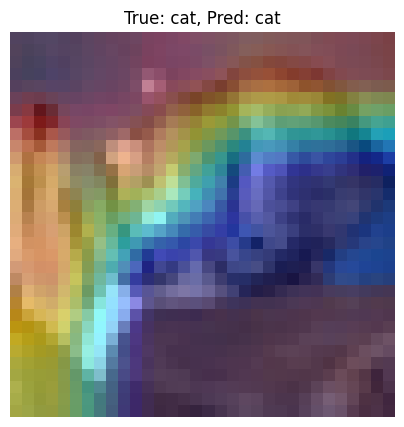

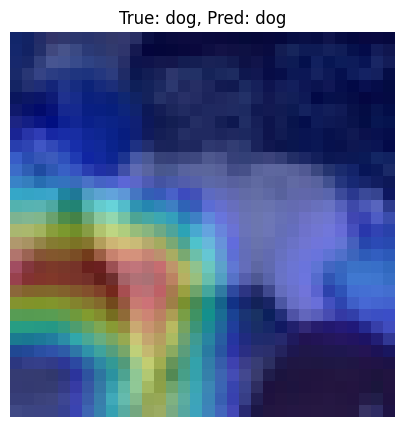

In [7]:
# 标签类别
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# 预测标签 & 真值标签
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# 取一张猫、一张狗图像的 index（或者你自己指定也行）
cat_index = np.where(y_true == 3)[0][0]
dog_index = np.where(y_true == 5)[0][0]

# 绘制 GradCAM 热力图
for index in [cat_index, dog_index]:
    img = x_test[index]
    img_input = np.expand_dims(img, axis=0)

    heatmap = make_gradcam_heatmap(img_input, grad_model)

    # 可视化热力图叠加效果
    img_rgb = np.uint8(255 * img)
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_rgb, 0.6, heatmap_color, 0.4, 0)

    # 显示结果
    plt.figure(figsize=(5, 5))
    plt.title(f"True: {class_names[y_true[index]]}, Pred: {class_names[y_pred_classes[index]]}")
    plt.imshow(superimposed_img[..., ::-1])  # OpenCV 的 BGR 转 RGB
    plt.axis('off')
    plt.show()


In [10]:
import zipfile

data_zip_path = "/content/drive/MyDrive/data.zip"
extract_to = "/content/mydata"

with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"✅ 解压完成，路径：{extract_to}")


✅ 解压完成，路径：/content/mydata


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


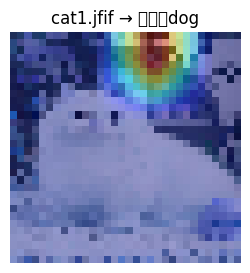

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


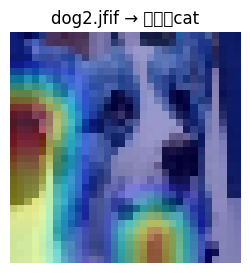

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


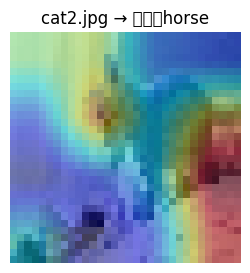

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


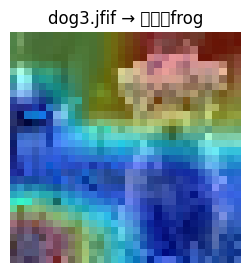

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


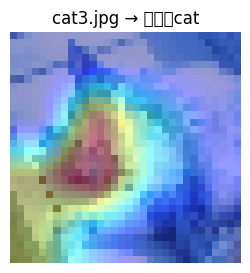

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


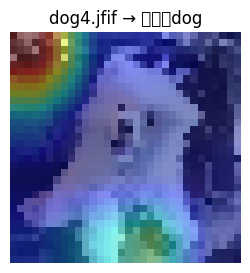

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


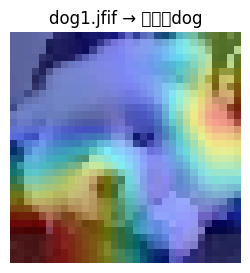

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


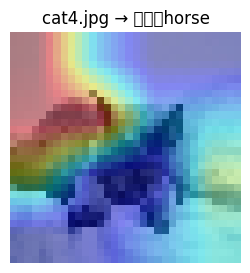

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 类别名称
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# 载入模型
model = load_model("/content/drive/MyDrive/cifar10_cnn_model.h5")

# 构建 Grad-CAM 模型（保持与训练结构一致）
from tensorflow.keras import Input, Model, layers

inputs = Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
target_conv_output = layers.Conv2D(64, (3, 3), activation='relu', name="target_conv")(x)
x = layers.Flatten()(target_conv_output)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
grad_model = Model(inputs=inputs, outputs=[target_conv_output, outputs])
grad_model.set_weights(model.get_weights())

# 图像路径
image_folder = "/content/mydata/data"

# 批次处理
for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
        img_path = os.path.join(image_folder, filename)

        img = image.load_img(img_path, target_size=(32, 32))
        img_array = image.img_to_array(img) / 255.0
        img_input = np.expand_dims(img_array, axis=0)

        pred = model.predict(img_input)
        pred_class = np.argmax(pred)

        heatmap = make_gradcam_heatmap(img_input, grad_model)

        img_rgb = np.uint8(255 * img_array)
        heatmap_resized = cv2.resize(heatmap, (32, 32))
        heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(img_rgb, 0.6, heatmap_color, 0.4, 0)

        plt.figure(figsize=(3, 3))
        plt.imshow(superimposed_img[..., ::-1])
        plt.title(f"{filename} → 預測：{class_names[pred_class]}")
        plt.axis('off')
        plt.show()


In [2]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/afhq')
with zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/afhq')

In [33]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/archive.zip"
extract_to = "/content/afhq"

# 解压前先删除旧目录（如果有）
if os.path.exists(extract_to):
    import shutil
    shutil.rmtree(extract_to)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ 解压完成")

# 列出解压后的目录
for root, dirs, files in os.walk(extract_to):
    print(f"📂 {root} - 子目录 {dirs[:3]}, 文件数 {len(files)}")
    break  # 只显示顶层


✅ 解压完成
📂 /content/afhq - 子目录 ['dog', 'cat', 'wild'], 文件数 0


336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
✅ 分类报告（真实标签为 cat=3, dog=5）：
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00         0
  automobile       0.00      0.00      0.00         0
        bird       0.00      0.00      0.00         0
         cat       0.77      0.39      0.52      5558
        deer       0.00      0.00      0.00         0
         dog       0.81      0.36      0.50      5169
        frog       0.00      0.00      0.00         0
       horse       0.00      0.00      0.00         0
        ship       0.00      0.00      0.00         0
       truck       0.00      0.00      0.00         0

    accuracy                           0.38     10727
   macro avg       0.16      0.08      0.10     10727
weighted avg       0.79      0.38      0.51     10727



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: U

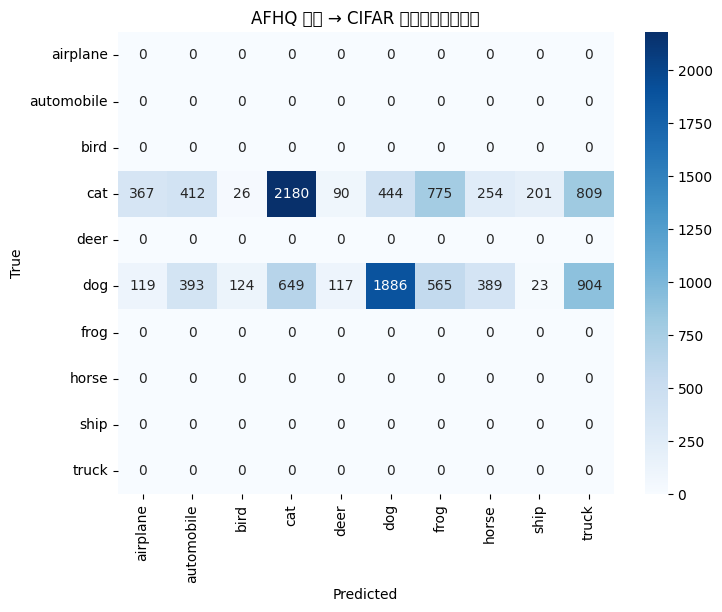

In [34]:
import numpy as np
import cv2
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_afhq_images(folder, label, img_size=(32, 32)):
    images, labels = [], []
    for fname in os.listdir(folder):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, fname)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            img = img / 255.0
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# 设定路径
cat_path = "/content/afhq/cat"
dog_path = "/content/afhq/dog"

x_cat, y_cat = load_afhq_images(cat_path, label=3)
x_dog, y_dog = load_afhq_images(dog_path, label=5)

# 合并数据
x_all = np.concatenate([x_cat, x_dog])
y_true = np.concatenate([y_cat, y_dog])

# 载入模型（你之前训练的模型）
model = load_model("/content/drive/MyDrive/cifar10_cnn_model.h5")

# 预测
y_pred_probs = model.predict(x_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# 输出报告
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

print("✅ 分类报告（真实标签为 cat=3, dog=5）：")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# 混淆矩阵
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title("AFHQ 猫狗 → CIFAR 模型预测混淆矩阵")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
